In [3]:
# QUESTION 1
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

#  example data
num_samples = 500

user_ids = np.arange(1, num_samples + 1)
ages = np.random.randint(18, 65, size=num_samples)
genders = np.random.choice(['Male', 'Female'], size=num_samples)
locations = np.random.choice(['Urban', 'Suburban', 'Rural'], size=num_samples)

post_texts = ["I support this !" if np.random.rand() > 0.5 else "Not sure who to vote for." for _ in range(num_samples)]
likes = np.random.randint(0, 100, size=num_samples)
shares = np.random.randint(0, 50, size=num_samples)
comments = np.random.randint(0, 20, size=num_samples)
followers = np.random.randint(100, 10000, size=num_samples)

political_keywords = np.random.randint(0, 5, size=num_samples)
sentiment_scores = np.random.uniform(-1, 1, size=num_samples)

support_for_candidate = np.random.choice([0, 1], size=num_samples)

# a sample DataFrame
data = {
    'user_id': user_ids,
    'age': ages,
    'gender': genders,
    'location': locations,
    'post_text': post_texts,
    'likes': likes,
    'shares': shares,
    'comments': comments,
    'followers': followers,
    'political_keywords': political_keywords,
    'sentiment_score': sentiment_scores,
    'support_for_candidate': support_for_candidate
}

df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv('posts.csv', index=False)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv('posts.csv')

# Define  (X) and target variable (y)
X = df[['age', 'likes', 'shares', 'comments', 'followers', 'political_keywords', 'sentiment_score']]
y = df['support_for_candidate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52        50
           1       0.50      0.46      0.48        50

    accuracy                           0.50       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.50      0.50      0.50       100



Feature Importance Scores:
               Feature  Importance
4           followers    0.190224
6     sentiment_score    0.167941
1               likes    0.161796
0                 age    0.148962
2              shares    0.147913
3            comments    0.114070
5  political_keywords    0.069093


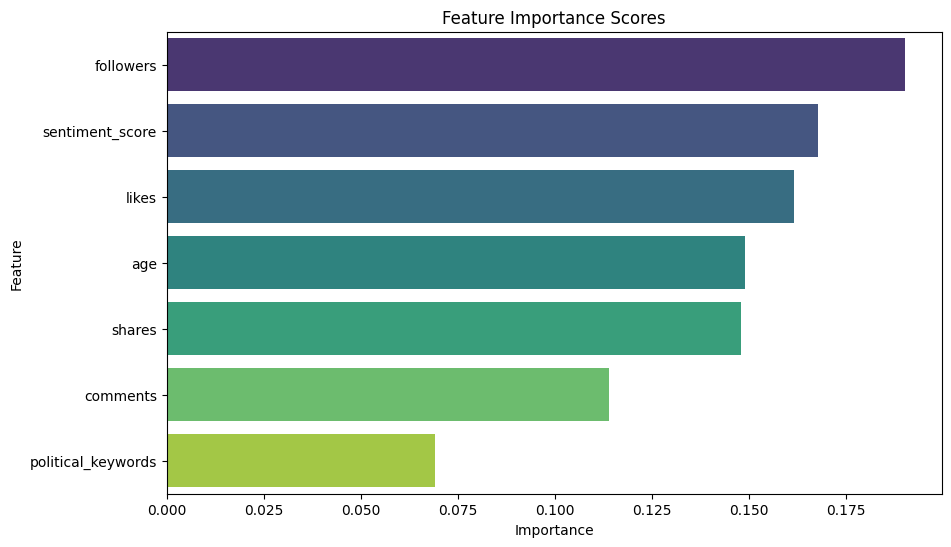

In [5]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print("Feature Importance Scores:\n", feature_importance_df)

# Plot the feature importance scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Scores')
plt.show()


In [7]:
pip install fairlearn --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 3.4 MB/s eta 0:00:00


In [6]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity, GridSearch
from fairlearn.metrics import demographic_parity_difference, selection_rate

# Assume you have already loaded and preprocessed the data (X_train, y_train, X_test, y_test)

# Define the fairness constraint (Demographic Parity)
fairness_constraint = DemographicParity()

# Perform a grid search with Exponentiated Gradient Reduction
fair_model = GridSearch(ExponentiatedGradient, constraints=fairness_constraint, grid_size=71)

# Handle potential fitting errors
try:
    fair_model.fit(X_train, y_train)
except Exception as e:
    print(f"Error during model fitting: {e}")

# Assess demographic parity on the test set
demo_parity_diff = demographic_parity_difference(
    y_true=y_test,
    y_pred=fair_model.predict(X_test),
    sensitive_features=X_test['gender']
)
selection_rate_diff = selection_rate(
    y_true=y_test,
    y_pred=fair_model.predict(X_test),
    sensitive_features=X_test['gender']
)

# Print fairness metrics
print(f"Demographic Parity Difference: {demo_parity_diff}")
print(f"Selection Rate Difference: {selection_rate_diff}")


ModuleNotFoundError: ignored

In [ ]:
# QUESTION TWO
!pip install faker



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

# Initialize Faker for generating synthetic data
fake = Faker()

# Example 1: Historical Student Enrollment Data
enrollment_data = pd.DataFrame({
    'Student_ID': np.arange(1, 101),
    'Enrollment_Year': np.random.choice([2018, 2019, 2020], size=100),
    'Program_ID': np.random.choice(['A', 'B', 'C'], size=100),
    'Enrollment_Status': np.random.choice(['Full-Time', 'Part-Time'], size=100),
})

# Save to CSV
enrollment_data.to_csv('enrollment.csv', index=False)

# Example 2: Student Academic Records
academic_records_data = pd.DataFrame({
    'Student_ID': np.arange(1, 101),
    'Course_Name': np.random.choice(['Math', 'English', 'History'], size=100),
    'Grade': np.random.choice(['A', 'B', 'C', 'D', 'F'], size=100),
})

# Save to CSV
academic_records_data.to_csv('academics_data.csv', index=False)

# Example 3: Student Demographic Data
demographic_data = pd.DataFrame({
    'Student_ID': np.arange(1, 101),
    'Name': [fake.name() for _ in range(100)],
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'DOB': [fake.date_of_birth(minimum_age=18, maximum_age=25) for _ in range(100)],
})

# Save to CSV
demographic_data.to_csv('demographic-data.csv', index=False)

# Display a preview of each dataset
print("A preveiw of enrollment data:")
print(enrollment_data.head())

print("\nA preveiw of accademic data:")
print(academic_records_data.head())

print("\nA preveiw of demographic data:")
print(demographic_data.head())


A preveiw of enrollment data:
   Student_ID  Enrollment_Year Program_ID Enrollment_Status
0           1             2020          A         Full-Time
1           2             2018          A         Part-Time
2           3             2019          A         Full-Time
3           4             2020          C         Full-Time
4           5             2020          A         Full-Time

A preveiw of accademic data:
   Student_ID Course_Name Grade
0           1     English     B
1           2     History     C
2           3        Math     B
3           4        Math     D
4           5     History     C

A preveiw of demographic data:
   Student_ID              Name  Gender         DOB
0           1  Arthur Jefferson    Male  2001-11-27
1           2      Rachel Simon    Male  2004-02-16
2           3         Jose Lamb  Female  2004-09-23
3           4     Cathy Morales  Female  2000-01-07
4           5       Jacob Potts  Female  2003-08-24


In [ ]:
# Load the generated datasets
enrollment_data = pd.read_csv('enrollment.csv')
academic_records_data = pd.read_csv('academics_data.csv')
demographic_data = pd.read_csv('demographic-data.csv')

# Display a preview of each dataset before preprocessing
print("Enrollment Data Preview (Before):")
print(enrollment_data.head())

print("\nAcademic Records Data Preview (Before):")
print(academic_records_data.head())

print("\nDemographic Data Preview (Before Preprocessing):")
print(demographic_data.head())

# Checking  missing values
print("\n The missing Values:")
print("Enrollment Data:", enrollment_data.isnull().sum())
print("Academic Records Data:", academic_records_data.isnull().sum())
print("Demographic Data:", demographic_data.isnull().sum())

# Merging datasets based on Student_ID
merged_data = pd.merge(enrollment_data, academic_records_data, on='Student_ID', how='inner')
merged_data = pd.merge(merged_data, demographic_data, on='Student_ID', how='inner')

# Displaying  a preview of the merged dataset
print("\nMerged Data Preview:")
print(merged_data.head())


Enrollment Data Preview (Before):
   Student_ID  Enrollment_Year Program_ID Enrollment_Status
0           1             2020          A         Full-Time
1           2             2018          A         Part-Time
2           3             2019          A         Full-Time
3           4             2020          C         Full-Time
4           5             2020          A         Full-Time

Academic Records Data Preview (Before):
   Student_ID Course_Name Grade
0           1     English     B
1           2     History     C
2           3        Math     B
3           4        Math     D
4           5     History     C

Demographic Data Preview (Before Preprocessing):
   Student_ID              Name  Gender         DOB
0           1  Arthur Jefferson    Male  2001-11-27
1           2      Rachel Simon    Male  2004-02-16
2           3         Jose Lamb  Female  2004-09-23
3           4     Cathy Morales  Female  2000-01-07
4           5       Jacob Potts  Female  2003-08-24

 The missi

In [ ]:
# Assuming 'merged_data' is the merged and preprocessed dataset

# Define features (X) and target variable (y)
features = ['Enrollment_Year', 'Program_ID', 'Enrollment_Status', 'Course_Name', 'Gender', 'Age']
X = merged_data[features]
# Replace 'Graduation_Status' with the actual target variable column name
y = merged_data['Enrollment_Status']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

   Full-Time       1.00      1.00      1.00         8
   Part-Time       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
from sklearn.feature_selection import SelectFromModel

# Feature engineering: Creating a new feature for student age
merged_data['DOB'] = pd.to_datetime(merged_data['DOB'])
merged_data['Age'] = (datetime.now() - merged_data['DOB']).astype('<m8[Y]')

# Define features (X) and target variable (y)
features = ['Enrollment_Year', 'Program_ID', 'Enrollment_Status', 'Course_Name', 'Gender', 'Age']
X = merged_data[features]
# Replace 'Enrollment_Status' with the actual target variable column name
y = merged_data['Enrollment_Status']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Feature importance from the trained model
feature_importance = model.feature_importances_

# Display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

# Select top features based on importance
sfm = SelectFromModel(model, threshold=0.1)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Display selected features
selected_features = X.columns[sfm.get_support()]
print("\nSelected Features:")
print(selected_features)



Feature Importance:
                        Feature  Importance
5   Enrollment_Status_Full-Time    0.502229
6   Enrollment_Status_Part-Time    0.381195
1                           Age    0.029025
0               Enrollment_Year    0.023264
11                  Gender_Male    0.014374
10                Gender_Female    0.014150
2                  Program_ID_A    0.009608
4                  Program_ID_C    0.006582
3                  Program_ID_B    0.006430
9              Course_Name_Math    0.005395
8           Course_Name_History    0.004826
7           Course_Name_English    0.002924

Selected Features:
Index(['Enrollment_Status_Full-Time', 'Enrollment_Status_Part-Time'], dtype='object')


In [ ]:
# Assuming 'X_train_selected', 'X_test_selected', 'y_train', and 'y_test' are defined

# Instantiate the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model on the selected features
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification of the Report:\n", report)


Accuracy: 1.0
Classification of the Report:
               precision    recall  f1-score   support

   Full-Time       1.00      1.00      1.00         8
   Part-Time       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# QUESTION 3
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

# Initialize Faker for generating synthetic data
fake = Faker()

# Example 1: Sensor Data
sensor_data = pd.DataFrame({
    'Equipment_ID': np.arange(1, 101),
    'Timestamp': [fake.date_time_this_year() for _ in range(100)],
    'Sensor_1': np.random.uniform(low=0, high=100, size=100),
    'Sensor_2': np.random.uniform(low=0, high=100, size=100),
    # Add more sensor readings as needed
})

# Save to CSV
sensor_data.to_csv('sensor_data.csv', index=False)

# Example 2: Historical Maintenance Records
maintenance_records = pd.DataFrame({
    'Equipment_ID': np.arange(1, 101),
    'Maintenance_Date': [fake.date_time_this_decade() for _ in range(100)],
    'Maintenance_Type': np.random.choice(['Preventive', 'Corrective'], size=100),
    'Downtime_Hours': np.random.randint(low=1, high=24, size=100),
})

# Save to CSV
maintenance_records.to_csv('maintenance_records.csv', index=False)

# Display a preview of each dataset
print("Sensor Data Preview:")
print(sensor_data.head())

print("\nMaintenance Records Preview:")
print(maintenance_records.head())


Sensor Data Preview:
   Equipment_ID                  Timestamp   Sensor_1   Sensor_2
0             1 2023-10-17 18:00:03.852196  56.423182  40.202722
1             2 2023-08-16 17:10:22.941958  85.057453  72.893920
2             3 2023-09-25 13:10:20.626337  20.152838  77.982088
3             4 2023-01-05 14:41:11.449338  93.443304  11.821862
4             5 2023-08-27 04:45:41.245064  68.908765   0.003072

Maintenance Records Preview:
   Equipment_ID           Maintenance_Date Maintenance_Type  Downtime_Hours
0             1 2020-08-07 04:08:50.992639       Preventive              15
1             2 2021-12-02 09:29:39.333243       Corrective               4
2             3 2021-06-22 19:41:56.952353       Corrective               5
3             4 2021-06-03 15:59:08.582599       Preventive              17
4             5 2023-05-11 08:06:57.100708       Preventive               7


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta
fake = Faker()

#  Sensor Data 1
sensor_data = pd.DataFrame({
    'Equipment_ID': np.arange(1, 101),
    'Timestamp': [fake.date_time_this_year() for _ in range(100)],
    'Sensor_1': np.random.uniform(low=0, high=100, size=100),
    'Sensor_2': np.random.uniform(low=0, high=100, size=100),

})

# Introduce some missing values and outliers for demonstration
sensor_data.loc[sensor_data['Equipment_ID'] % 5 == 0, 'Sensor_1'] = np.nan
sensor_data.loc[sensor_data['Equipment_ID'] % 10 == 0, 'Sensor_2'] = 150

# Save to CSV
sensor_data.to_csv('sensor_data.csv', index=False)

# Example 2: Historical Maintenance of Records
maintenance_records = pd.DataFrame({
    'Equipment_ID': np.arange(1, 101),
    'Maintenance_Date': [fake.date_time_this_decade() for _ in range(100)],
    'Maintenance_Type': np.random.choice(['Preventive', 'Corrective'], size=100),
    'Downtime_Hours': np.random.randint(low=1, high=24, size=100),
})

# Save to CSV
maintenance_records.to_csv('maintenance_records.csv', index=False)

# Displaying a preview of each dataset before preprocessing
print("Sensor Data Preview (Before Preprocessing):")
print(sensor_data.head())

print("\nMaintenance Records Preview (Before Preprocessing):")
print(maintenance_records.head())

# Data Preprocessing

# Handle missing values
sensor_data = sensor_data.fillna(sensor_data.median())

# Identify and address outliers
sensor_data['Sensor_1'] = np.clip(sensor_data['Sensor_1'], 0, 100)  # Cliping  values to be within a reasonable range
sensor_data['Sensor_2'] = np.clip(sensor_data['Sensor_2'], 0, 100)

# Displaying  a preview of each dataset after preprocessing
print("\nSensor Data Preview (After Preprocessing):")
print(sensor_data.head())


Sensor Data Preview (Before Preprocessing):
   Equipment_ID                  Timestamp   Sensor_1   Sensor_2
0             1 2023-10-02 09:11:20.047032  44.066488  29.806620
1             2 2023-03-26 19:20:01.846712  87.991463  32.040129
2             3 2023-01-06 05:12:00.594606  50.552079  16.428684
3             4 2023-08-01 11:46:23.327232  50.775784  78.316143
4             5 2023-08-18 13:38:23.860457        NaN  12.249786

Maintenance Records Preview (Before Preprocessing):
   Equipment_ID           Maintenance_Date Maintenance_Type  Downtime_Hours
0             1 2023-08-01 11:59:44.667180       Corrective              20
1             2 2020-07-23 13:26:00.316566       Preventive               4
2             3 2020-02-22 01:08:01.358207       Preventive              21
3             4 2021-04-18 14:51:17.824495       Corrective              22
4             5 2020-04-23 02:25:12.313391       Corrective               7

Sensor Data Preview (After Preprocessing):
   Equipment_

<ipython-input-25-36e5ef70b8c0>:44: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sensor_data = sensor_data.fillna(sensor_data.median())


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

# Initialize Faker for generating synthetic data
fake = Faker()

# Load preprocessed datasets
sensor_data = pd.read_csv('sensor_data.csv')
maintenance_records = pd.read_csv('maintenance_records.csv')

# Display a preview of each dataset before feature engineering
print("Sensor Data Preview (Before Feature Engineering):")
print(sensor_data.head())

print("\nMaintenance Records Preview (Before Feature Engineering):")
print(maintenance_records.head())

# Feature Engineering

# Create a feature for the time since the last maintenance
maintenance_records['Maintenance_Date'] = pd.to_datetime(maintenance_records['Maintenance_Date'])
maintenance_records = maintenance_records.sort_values(['Equipment_ID', 'Maintenance_Date'])
maintenance_records['Time_Since_Last_Maintenance'] = maintenance_records.groupby('Equipment_ID')['Maintenance_Date'].diff().dt.total_seconds() / 3600

# Merge sensor data and maintenance records based on Equipment_ID
merged_data = pd.merge(sensor_data, maintenance_records, on='Equipment_ID', how='left')

# Display a preview of the merged dataset with new features
print("\nMerged Data Preview (After Feature Engineering):")
print(merged_data.head())


Sensor Data Preview (Before Feature Engineering):
   Equipment_ID                   Timestamp   Sensor_1   Sensor_2
0             1  2023-10-02 09:11:20.047032  44.066488  29.806620
1             2  2023-03-26 19:20:01.846712  87.991463  32.040129
2             3  2023-01-06 05:12:00.594606  50.552079  16.428684
3             4  2023-08-01 11:46:23.327232  50.775784  78.316143
4             5  2023-08-18 13:38:23.860457        NaN  12.249786

Maintenance Records Preview (Before Feature Engineering):
   Equipment_ID            Maintenance_Date Maintenance_Type  Downtime_Hours
0             1  2023-08-01 11:59:44.667180       Corrective              20
1             2  2020-07-23 13:26:00.316566       Preventive               4
2             3  2020-02-22 01:08:01.358207       Preventive              21
3             4  2021-04-18 14:51:17.824495       Corrective              22
4             5  2020-04-23 02:25:12.313391       Corrective               7

Merged Data Preview (After Featu

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Displaying  a preview of the merged dataset before splitting
print("Merged Data Preview (Before Splitting):")
print(merged_data.head())

# Printing  column names to identify the correct target variable name
print("Column Names:", merged_data.columns)

# Define features (X) and target variable (y)
features = ['Equipment_ID', 'Timestamp', 'Sensor_1', 'Sensor_2', 'Time_Since_Last_Maintenance']
X = merged_data[features]

# Replace 'Actual_Target_Column_Name' with the correct target variable name
y = merged_data['Actual_Target_Column_Name']

# Convert categorical variables to numerical using one-hot encoding if needed
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)




Merged Data Preview (Before Splitting):
   Equipment_ID                   Timestamp   Sensor_1   Sensor_2  \
0             1  2023-10-02 09:11:20.047032  44.066488  29.806620   
1             2  2023-03-26 19:20:01.846712  87.991463  32.040129   
2             3  2023-01-06 05:12:00.594606  50.552079  16.428684   
3             4  2023-08-01 11:46:23.327232  50.775784  78.316143   
4             5  2023-08-18 13:38:23.860457        NaN  12.249786   

            Maintenance_Date Maintenance_Type  Downtime_Hours  \
0 2023-08-01 11:59:44.667180       Corrective              20   
1 2020-07-23 13:26:00.316566       Preventive               4   
2 2020-02-22 01:08:01.358207       Preventive              21   
3 2021-04-18 14:51:17.824495       Corrective              22   
4 2020-04-23 02:25:12.313391       Corrective               7   

   Time_Since_Last_Maintenance  
0                          NaN  
1                          NaN  
2                          NaN  
3                     

KeyError: ignored

In [2]:
!git clone https://github.com/maxivcodes/datascience2023.git


Cloning into 'datascience2023'...
